## An introductory demonstration of PyFVTool

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The recommended way of importing PyFVTool is to use `pf` as the shortcut.

In [2]:
import pyfvtool as pf

### Create a 1D mesh and visualize it

The simplest mesh is the Cartesian 1D grid, an example of which will be created here.

The mesh-structure object is created via the `Grid1D` class.

In [3]:
L = 1.0  # length of the domain
Nx = 10  # number of cells in the domain

In [4]:
m = pf.Grid1D(Nx, L) # mesh-structure

We can have a look at the structure of the mesh that was created.

The `_x`, `_y`, `_z` are the coordinate labels used internally by PyFVTool. These are not intended to be used directly by the user.

The coordinate labels for the user are given in the `coordlabels` dictionary. In this particular `Grid1D` case, the user `x` label maps to the internal `_x` label. The other coordinates are not used, as the mesh is one-dimensional.

In [5]:
print(m)

dims: [10]
cellsize: _x: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

cellcenters: _x: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

facecenters: _x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

corners: [1]
edges: [1]



1D meshes can be created in two ways because the function is overloaded, as shown in the help docstring.

In [6]:
help(pf.Grid1D)

Help on class Grid1D in module pyfvtool.mesh:

class Grid1D(MeshStructure)
 |  Grid1D(*args)
 |
 |  Mesh based on a 1D Cartesian grid (x)
 |  =====================================
 |
 |  This class can be instantiated in different ways: from a list of cell face
 |  locations or from the number of cells and domain length.
 |
 |  Instantiation Options:
 |  ----------------------
 |  - Grid1D(Nx, Lx)
 |  - Grid1D(face_locationsX)
 |
 |
 |  Parameters
 |  ----------
 |  Grid1D(Nx, Lx)
 |      Nx : int
 |          Number of cells in the x direction.
 |      Lx : float
 |          Length of the domain in the x direction.
 |
 |  Grid1D(face_locationsX)
 |      face_locationsX : ndarray
 |          Locations of the cell faces in the x direction.
 |
 |  Examples
 |  --------
 |  >>> import numpy as np
 |  >>> from pyfvtool import Grid1D
 |  >>> mesh = Grid1D(10, 10.0)
 |  >>> print(mesh)
 |
 |  Method resolution order:
 |      Grid1D
 |      MeshStructure
 |      builtins.object
 |
 |  Methods 

In [7]:
# 1D, 2D, 3D, 1D radial (axial symmetry), and 2D cylindrical grids can be constructed: 
# help(pf.Grid1D)
# help(pf.Grid2D)
# help(pf.Grid3D)
# help(pf.CylindricalGrid1D)
# help(pf.CylindricalGrid2D)

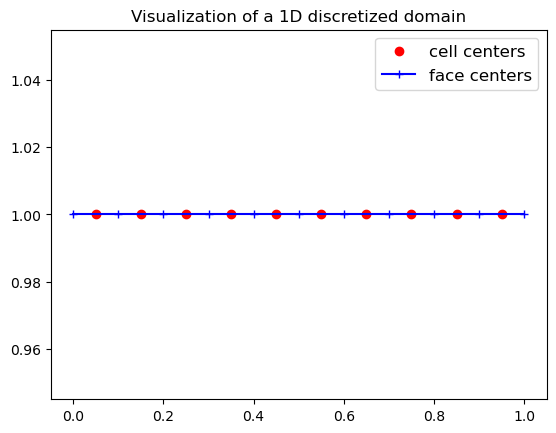

In [8]:
# Visualize the 1D discretization that we created above
hfig, ax = plt.subplots(1,1, num='Grid discretization')
ax.plot(m.cellcenters.x, np.ones(np.shape(m.cellcenters.x), dtype=float), 'or', label='cell centers')
ax.plot(m.facecenters.x, np.ones(np.shape(m.facecenters.x), dtype=float), '-+b', label='face centers')
plt.legend(fontsize=12, loc='best')
ax.set_title('Visualization of a 1D discretized domain');

### Create a 2D grid and visualize it

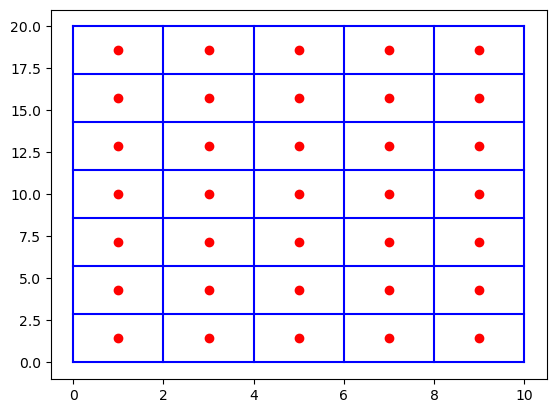

In [9]:
Nx, Ny = 5, 7
Lx, Ly = 10.0, 20.0
m = pf.Grid2D(Nx, Ny, Lx, Ly)

X, Y = np.meshgrid(m.cellcenters.x, m.cellcenters.y, indexing='ij')
Xf, Yf = np.meshgrid(m.facecenters.x, m.facecenters.y, indexing='ij')

plt.figure()
plt.plot(X, Y, 'or', label='nodes')
plt.plot(Xf, Yf, 'b-', label='faces (west/east)')
plt.plot(Xf.T, Yf.T, 'b-', label='faces (north/south)');

### Create a 3D grid and visualize it

In [10]:
Nx, Ny, Nz = 2, 3, 4
Lx, Ly, Lz = 1.0, 2.0, 3.0

m = pf.Grid3D(Nx, Ny, Nz, Lx, Ly, Lz)

We can obtain information of the positions of the cell centers.

As can be seen, the user coordinate labels `x`, `y` and `z` map internally to `_x`, `_y`, `_z`. The correspondence is trivial in this case, but this is not so in the case of cylindrical or spherical coordinates.

In [11]:
m.cellcenters

_x: [0.25 0.75]
_y: [0.33333333 1.         1.66666667]
_z: [0.375 1.125 1.875 2.625]
coordlabels: {'x': '_x', 'y': '_y', 'z': '_z'}

The (compact) information on the cell centers can be converted into a full grid in the following way.

In [12]:
X, Y, Z = np.meshgrid(m.cellcenters.x,
                      m.cellcenters.y,
                      m.cellcenters.z,
                      indexing='ij')
Xf, Yf, Zf = np.meshgrid(m.facecenters.x,
                         m.facecenters.y,
                         m.facecenters.z,  
                         indexing='ij')

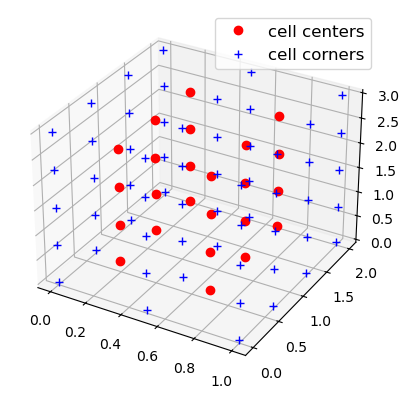

In [13]:
# Plot the 3D grid

# TO DO: make this interactive! this will require ipywidgets
# This can probably only be done once these Notebooks are not used as pytest tests anymore.
# The Notebooks used for tests should be converted to simple test scripts, and the Notebooks
# can then simply be used as examples.

hfig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(X.flatten(), Y.flatten(), Z.flatten(), 'ro', label='cell centers')
ax.plot3D(Xf.flatten(), Yf.flatten(), Zf.flatten(), 'b+', label='cell corners')
ax.legend(fontsize=12, loc='best');

### Boundary conditions

One of the most important features of PyFVTool is the ability to implement different boundary conditions (BCs) for variables in the most convenient way. 

The implementation of BCs in PyFVTool enables the user to define either a periodic boundary condition or a general boundary condition of the following form:

$$a (\nabla \phi .\mathbf{n}) + b \phi = c $$

In the above equation, $\phi$ is the unknown, and $a$, $b$, and $c$ are constants. In practice, this boundary condition equation will be discretized to the following system of algebraic equations:

$$M_{bc} \phi = {RHS}_{bc}$$

By adjusting the values of $a$, $b$ and $c$, one of the following well-known types of boundary conditions can easily be defined:

 - Neumann ($a$ is nonzero; $b$ is 0)
 - Dirichlet ($a$ is zero; $b$ is nonzero)
 - Robin ($a$ and $b$ are both nonzero)

First, let's create a simple mesh again.

In [14]:
Nx = 10  # number of cells in the domain
Lx = 1.0  # length of the domain
m = pf.Grid1D(Nx, Lx)  # createMesh and createMesh are identical

Then, on this mesh, we will define a solution variable, via the `CellVariable` class. We will initialize its value to be 0.0 everywhere.

In [15]:
phi = pf.CellVariable(m, 0.0)

The `CellVariable` object carries with it boundary conditions, that have been created by default. These boundary conditions will be applied by PyFVTool where required.

Let's have a look at the BC structure.

This also prints info on the mesh, which may be a bit confusing.

In [16]:
print(phi.BCs) # display the BC structure

domain : dims: [10]
cellsize: _x: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

cellcenters: _x: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

facecenters: _x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

corners: [1]
edges: [1]

left : a : [1.]
b : [0.]
c : [0.]
periodic : False

right : a : [1.]
b : [0.]
c : [0.]
periodic : False

bottom : a : []
b : []
c : []
periodic : False

top : a : []
b : []
c : []
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False




For simplicity, display only information for the left boundary, and then only information for the right boundary.

In [17]:
print("Left BC")
print(phi.BCs.left)   # a non-zero, b and c == 0, --> homogeneous Neumann BC at left boundary
print()
print("Right BC")
print(phi.BCs.right)  # same as left boundary --> homogeneous Neumann BC at right-boundary

Left BC
a : [1.]
b : [0.]
c : [0.]
periodic : False


Right BC
a : [1.]
b : [0.]
c : [0.]
periodic : False



Both the left and right BCs have the same values for $a$, $b$ and $c$. These are the default BCs that are created: Neumann-style BCs with a zero value of the derivative at the boundary. Such BCs are also called "zero flux boundary conditions".

Boundary conditions can be adapted "on the fly", but once the values have been changed, be sure to call the `apply_BCs()` method, such that all internal information in the `CellVariable` is updated to reflect the new BCs. 

**Important note:** For properly setting the BCs, even in this 1D Cartesian case, be sure to assign values to the individual array elements using `[:]`. Forgetting the `[:]` here may lead to errors.

In [18]:
phi.BCs.left.a[:] = 0.0
phi.BCs.left.b[:] = 1.0  # homogeneous Dirichlet boundary condition
phi.BCs.left.c[:] = 0.0  

# Periodic boundary conditions override the other settings (take precedence)
phi.BCs.left.periodic = True

phi.apply_BCs()

print(phi.BCs.left)

a : [0.]
b : [1.]
c : [0.]
periodic : True



For boundary condition structures created for 2D and 3D grids, we will have left, right, bottom, top, back, and front boundaries and thus substructures. Let me show them to you in action:

In [19]:
m = pf.Grid2D(3, 4, 1.0, 2.0)  # Nx, Ny, Lx, Ly

phi = pf.CellVariable(m, 0.0)

print(phi.BCs)

domain : dims: [3 4]
cellsize: _x: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
_y: [0.5 0.5 0.5 0.5 0.5 0.5]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

cellcenters: _x: [0.16666667 0.5        0.83333333]
_y: [0.25 0.75 1.25 1.75]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

facecenters: _x: [0.         0.33333333 0.66666667 1.        ]
_y: [0.  0.5 1.  1.5 2. ]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

corners: [ 0 24  5 29]
edges: [1]

left : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [[0. 0. 0. 0.]]
periodic : False

right : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [0. 0. 0. 0.]
periodic : False

bottom : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

top : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False




In [20]:
print(phi.BCs.top)

a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False



Yes, that's right. a, b, and c are vectors. It means that you can have different boundary conditions for different cell faces at each boundary. For instance, I can have a Neumann boundary condition for the first cell and a Dirichlet boundary condition for the last cell at the top boundary:


In [21]:
# homogeneous Neumann
phi.BCs.top.a[0] = 1.0
phi.BCs.top.b[0] = 0.0
phi.BCs.top.c[0] = 0.0

# homogeneous Dirichlet
phi.BCs.top.a[-1] = 0.0
phi.BCs.top.b[-1] = 1.0
phi.BCs.top.c[-1] = 0.0

phi.apply_BCs()

In [22]:
# Some fancy display!
print('  a  b  c (top)')
print('---------------')
print(np.hstack((np.atleast_2d(phi.BCs.top.a).T, 
                 np.atleast_2d(phi.BCs.top.b).T,
                 np.atleast_2d(phi.BCs.top.c).T)))

# top.  a     b     c
#    ---------------
#      1     0     0
#      1     0     0
#      0     1     0

  a  b  c (top)
---------------
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


The same procedure can be followed for a 3D grid. However, $a$, $b$, and $c$ values are 2D matrices for a 3D grid. This will be discussed in more details when we reach the practical examples. 

**Important note:** As already mentioned, if you need to assign a boundary condition to the entire boundary, use `[:]` in your assignment. For instance, to define a Dirichlet boundary for the right boundary, you may write the following.

In [23]:
phi.BCs.right.a[:] = 0
phi.BCs.right.b[:] = 1
phi.BCs.right.c[:] = 0

phi.apply_BCs()

print('  a  b  c (right)')
print('---------------')
print(np.hstack((np.atleast_2d(phi.BCs.right.a).T,
                 np.atleast_2d(phi.BCs.right.b).T,
                 np.atleast_2d(phi.BCs.right.c).T)))

  a  b  c (right)
---------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Solve a diffusion equation

As the first example, we solve a steady-state diffusion equation of the following form

$$\nabla\cdot\left(-D\nabla c\right)=0$$

where $D$ is the diffusivity and $c$ is the concentration. Let me assume that we have a 1D domain, with Dirichlet boundary conditions at both boundaries, i.e., at $x$=0, $c$=1; and at $x$=$L$, $c$=0. First of all, we need to define our domain, discretize it, and define the boundaries at the borders.

*Note:*  This is a boundary value problem and we will be solving for the steady-state solution, without any transient term.

First create a 1D Cartesian grid and a solution variable called `c`.

In [24]:
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid1D(Nx, L) 

c = pf.CellVariable(m, 0.0)

Now switch from the default 'no flux' boundary conditions to Dirichlet conditions, on both sides of the domain.

**IMPORTANT** Do not forget to call `apply_BCs()`!!

In [25]:
# left boundary 
c.BCs.left.a[:] = 0.0
c.BCs.left.b[:] = 1.0
c.BCs.left.c[:] = 0.0

# right boundary
c.BCs.right.a[:] = 0.0
c.BCs.right.b[:] = 1.0
c.BCs.right.c[:] = 1.0   

c.apply_BCs()

print(c.BCs.left)
print(c.BCs.right)

a : [0.]
b : [1.]
c : [0.]
periodic : False

a : [0.]
b : [1.]
c : [1.]
periodic : False



The next step is to define the diffusion coefficient. In this FVTool, the physical properties of the domain are defined for each cell, again as a `CellVariable` object.

*Remark.* This variable is not a solution variable, and even though the `CellVariable` will internally contain a default `BCs` structure, these 'dummy' boundary conditions will of course not be used, are of no consequence and can be forgotten.

In [26]:
D = pf.CellVariable(m, 1e-5)  # assign a constant value of 1e-5 to diffusivity value on each cell

However, the diffusion coefficients must be known on the *face* of each cell. 

To obtain the values at the faces from the values at the centers, we have a few typical FVM averaging schemes at our disposal. For a 1D domain, we can use a harmonic mean scheme.

Notes:
 - this "averaging" is actually an interpolation. It takes the nearest neighbor harmonic mean
 - the harmonic mean skews towards outliers with small values

In [27]:
D_face = pf.harmonicMean(D)  # average diffusivity value on the cell faces.

Now, we can convert the PDE to a, algebraic system of linear equations, i.e. a matrix equation to be solved.

$$\nabla\cdot\left(-D\nabla c\right) \rightarrow \mathbf{M}\mathbf{c} = \textrm{rhs}$$

$\mathbf{M}$ is the matrix of coefficients that is going to be constructed by PyFVTool, on basis of the finite-volume formulation. In this manner, PyFVTool will also construct the vector $\textrm{rhs}$ which is commonly called the right-hand side.

$\mathbf{M}$ and  $\textrm{rhs}$ will be constructed from the definition of the solution variable, in particular its boundary conditions, and (in this case) from the diffusion term. The latter will be placed in a list of equation terms that will be supplied to the solver function `solvePDE()`. If you look at it in detail, `pf.diffusionTerm()` creates a matrix that will be added to the overall matrix $\mathbf{M}$ for the matrix equation. This provides a mechanism for adding several different terms (diffusion, advection/convection, source/reaction) to the equation.

`solvePDE()` will take care of constructing the matrix equation, and then calling the numerical (sparse matrix) solver.

The vector $\mathbf{c}$ will contain the finite-volume cell values of the concentration as the numerical solution of the matrix equation.

In [28]:
eqn = [-pf.diffusionTerm(D_face)]

In [29]:
pf.solvePDE(c, eqn);

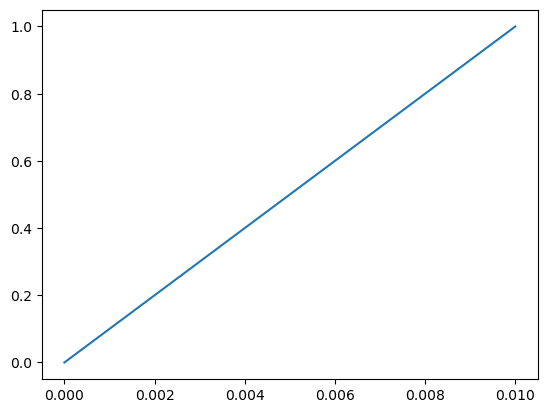

In [30]:
# visualize the solution
plt.figure()
pf.visualizeCells(c)

Just to get excited a little bit, only change the mesh definition command from `Grid1D(Nx,L)` to `Grid2D(Nx,Nx,L,L)`, run the code and see what happens.

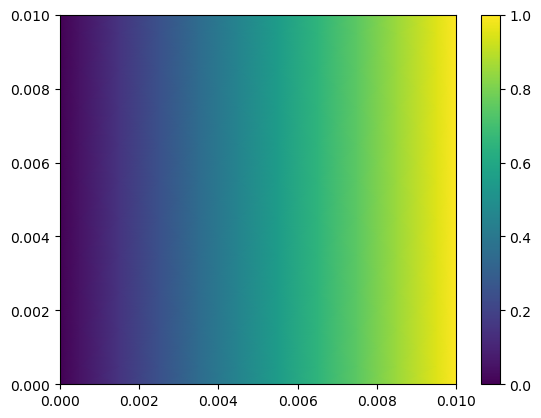

In [31]:
# 2D
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid2D(Nx, Nx, L, L)
c = pf.CellVariable(m, 0.0)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
# left boundary: homogeneous Dirichlet left-side 
c.BCs.left.a[:], c.BCs.left.b[:], c.BCs.left.c[:] = 0.0, 1.0, 0.0
# right boundary: inhomogeneous Dirchlet right-side
c.BCs.right.a[:], c.BCs.right.b[:], c.BCs.right.c[:] = 0.0, 1.0, 1.0

c.apply_BCs() # DO NOT FORGET THIS!!

# Create a face-variable for the diffusion coefficient
D = pf.CellVariable(m, 1e-5)  # define the diffusivity
D_face = pf.harmonicMean(D)  # interpolate to face positions

# Solve the problem in 2D
eqn = [-pf.diffusionTerm(D_face)]
pf.solvePDE(c, eqn)

# Visualize the solution
plt.figure()
pf.visualizeCells(c)
plt.colorbar();

For even more excitement, change  to `Grid3D(Nx,Nx,Nx,L,L,L)`!

<Figure size 640x480 with 0 Axes>

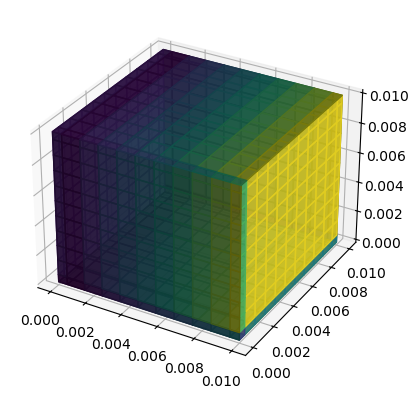

In [32]:
# 3D
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid3D(Nx, Nx, Nx, L, L, L)  
c = pf.CellVariable(m, 0.0)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
# left boundary: homogeneous Dirichlet left-side 
c.BCs.left.a[:], c.BCs.left.b[:], c.BCs.left.c[:] = 0.0, 1.0, 0.0
# right boundary: inhomogeneous Dirchlet right-side
c.BCs.right.a[:], c.BCs.right.b[:], c.BCs.right.c[:] = 0.0, 1.0, 1.0

c.apply_BCs() # DO NOT FORGET THIS!!

# Create a face-variable for the diffusion coefficient
D = pf.CellVariable(m, 1e-5)  # define the diffusivity
D_face = pf.harmonicMean(D)  # interpolate to face positions

# Solve the problem in 3D
eqn = [-pf.diffusionTerm(D_face)]
pf.solvePDE(c, eqn)

# Visualize the solution
hfig = plt.figure()
# ax = hfig.add_subplot(projection='3d')
pf.visualizeCells(c)
# plt.colorbar()

This is usually the way we develop new mathematical models for a physical phenomenon. Write the equation, solve it in 1D, compare it to the analytical solution, then solve it numerically in 2D and 3D for more realistic cases with heterogeneous transfer coefficients and other nonidealities (and perhaps compare it to some experimental data)

### Solve a steady-state convection-diffusion problem, building up the matrix equation

Here, we are going to add a convection term to what we solved in the previous example. 

This tutorial is adapted from the FiPy convection-diffusion example you can find at this address:

http://www.ctcms.nist.gov/fipy/examples/convection/index.html

The differential equation reads

$$\nabla\cdot\left(\mathbf{u} \phi -D\nabla \phi \right)=0$$

Here, $\mathbf{u}$ is a velocity vector (face variable) and $D$ is the diffusion coefficient (again a face variable). Please see the PDF document for an explanation of cell and face variables. We use Dirichlet (constant value) boundary conditions on the left and right boundaries. It is zero at the left boundary and one at the right boundary. The analytical solution of this differential equation reads

$$c = \frac{1-\exp(ux/D)}{1-\exp(uL/D)}$$



Here, following a more "low-level" approach, we are not going to use `solvePDE()`. Instead, we will construct the matrix equation ourselves and then call `solveMatrixPDE()`. In this case, working on a steady-state problem, it is not even necessary to define the solution variable first. We can simply create the matrix/RHS corresponding to the boundary conditions.

In [33]:
# Define the domain and mesh
L = 1.0   # domain length
Nx = 25  # number of cells
meshstruct = pf.Grid1D(Nx, L)
x = meshstruct.cellcenters.x   #  extract the cell center positions

In [34]:
# Define the boundary condition as a stand-alone structure, outside of a CellVariable
BC = pf.BoundaryConditions(meshstruct)   # all Neumann boundary condition structure
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0.0, 1.0, 0.0    # switch the left boundary to homogeneous Dirichlet
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0.0, 1.0, 1.0 # switch the right boundary to inhomogeneous Dirichlet

In [35]:
# Now we define the transfer coefficients:
D_val = 1.0  # diffusion coefficient value
D = pf.CellVariable(meshstruct, D_val)  # assign dif. coef. to all the cells
Dave = pf.harmonicMean(D)    # convert a cell variable to face variable

u = -10.0 # velocity value
u_face = pf.FaceVariable(meshstruct, u)  # assign velocity value to cell faces

Now we discretize the differential equation into a system of linear algebraic equations:

$$(M_{conv}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

or if we use an upwind discretization scheme, we will obtain:

$$(M_{conv,uw}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

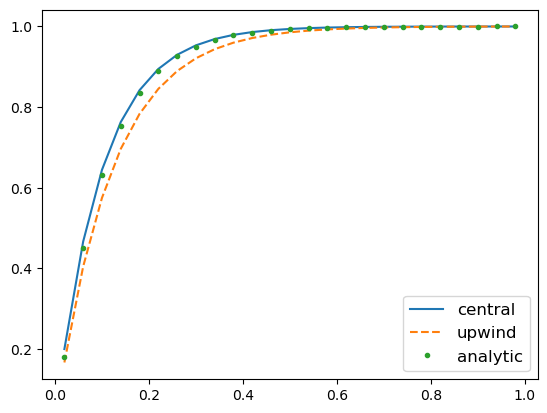

In [36]:
# convection term, central, second order
Mconv =  pf.convectionTerm(u_face) 

#  convection term, upwind, first order
Mconvupwind = pf.convectionUpwindTerm(u_face) 

# Diffusion term
Mdiff = pf.diffusionTerm(Dave)

# boundary condition discretization
Mbc, RHSbc = pf.boundaryConditionsTerm(BC)

# Coefficient matrix for central finite-differencing scheme
M = Mconv - Mdiff + Mbc 

# Coefficient matrix for upwind discretization scheme
Mupwind = Mconvupwind-Mdiff+Mbc

# Righ-hand-side vector
RHS = RHSbc

# solve for the central scheme
c = pf.solveMatrixPDE(meshstruct, M, RHS)

# solve for the upwind scheme
c_upwind = pf.solveMatrixPDE(meshstruct, Mupwind, RHS)

# analytic solution
c_analytical = (1-np.exp(u*x/D_val))/(1-np.exp(u*L/D_val))

# visualization
plt.figure()
plt.plot(x, c.innerCellValues, '-', label='central')
plt.plot(x, c_upwind.innerCellValues, '--', label='upwind')
plt.plot(x, c_analytical, '.', label='analytic')
plt.legend(fontsize=12, loc='best');

As you see here, we obtain a more accurate result by using a central difference discretization scheme for the convection term compared to the first order upwind.

---

**WARNING: work in progress! (MW 240504)**

The demonstrations below have not yet been updated to reflect the 'new style' `CellVariable`, `BCs` and `solvePDE` in the current PyFVTool (version 0.3.2)

---

### Solve a transient diffusion equation

This example is adapted from the FiPy 1D diffusion example

The transient diffusion equation reads

$$\alpha\frac{\partial c}{\partial t}+\nabla \cdot \left(-D\nabla c\right)=0,$$

where $c$ is the independent variable (concentration, temperature, etc) , $D$ is the diffusion coefficient, and $\alpha$ is a constant.


In [37]:
# Define the domain and create a mesh structure
L = 50.0   # domain length
Nx = 20  # number of cells
m = pf.Grid1D(Nx, L)
x = m.cellcenters.x  # cell centers position

In [38]:
# Create the boundary condition structure:
BC = pf.BoundaryConditions(m)  # all Neumann boundary condition structure

# Switch the left and right boundaries to Dirichlet:
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0.0, 1.0, 1.0    # left boundary
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0.0, 1.0, 0.0 # right boundary

In [39]:
# Define the transfer coefficients:
D_val = 1.0
D = pf.CellVariable(m, D_val)
Dave = pf.harmonicMean(D)  # convert it to face variables

# Define alfa, the coefficient of the transient term:
alfa_val = 1
alfa = pf.CellVariable(m, alfa_val)

In [40]:
# Define the initial values:
c_init = 0.0
c_old = pf.CellVariable(m, c_init, BC)  # initial values
c = c_old  # assign the old value of the cells to the current values

In [41]:
# Now define the time step and the final time:
dt = 0.1  # time step
final_t = 100.0

Here, we first define the coefficient matrices that will not change as we progress in time, viz. diffusion term and boundary condition:


In [42]:
Mdiff = pf.diffusionTerm(Dave)
Mbc, RHSbc = pf.boundaryConditionsTerm(BC)

The transitionTerm function gives a matrix of coefficient and a RHS vector. The matrix of coefficient does not change in each time step, but the RHS does (see the PDF documents). Therefore, we need to call the function inside the time loop. Start the loop here:

In [43]:
# import the error function from scipy
from scipy.special import erf

In [44]:
tt = np.arange(start=dt, stop=final_t, step=dt) # t=dt:dt:final_t

ci = []
ca = []
for ii, t in enumerate(tt):        
    M_trans, RHS_trans = pf.transientTerm(c_old, dt, alfa)
    
    M = M_trans-Mdiff+Mbc
    RHS = RHS_trans+RHSbc
    
    ci.append( pf.solveMatrixPDE(m, M, RHS) )
    
    ca.append( 1.0-erf(x/(2*np.sqrt(D_val*t))))
    c_old = ci[ii]

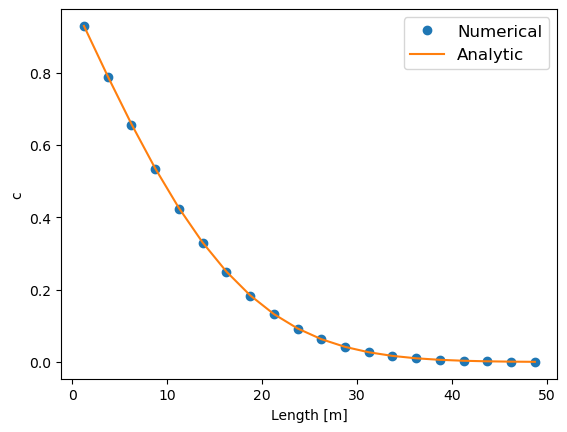

In [45]:
# Now visualize the final results
plt.figure()
plt.plot(x, ci[-1].innerCellValues, 'o', label='Numerical')
plt.plot(x, ca[-1], '-', label='Analytic')
plt.xlabel('Length [m]')
plt.ylabel('c')
plt.legend(fontsize=12, loc='best');

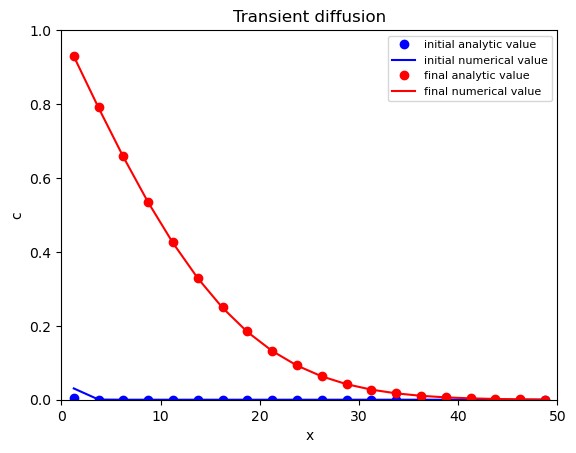

In [46]:
# Plotting and visualization of the 1D transient diffusion solution  
from matplotlib.animation import FuncAnimation

hfig1, ax1 = plt.subplots()

ax1.plot(x, ca[0], 'bo', label='initial analytic value')
ax1.plot(x, ci[0].innerCellValues, 'b-', label='initial numerical value')

ax1.plot(x, ca[-1], 'ro', label='final analytic value')
ax1.plot(x, ci[-1].innerCellValues, 'r-', label='final numerical value')

ax1.set_xlim((0, L))
ax1.set_ylim((0.0, 1.0))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('Transient diffusion')
ax1.legend(fontsize=8);

### Convection equations; different discretization schemes

If I want to highlight one special feature of this FVTool, I will point a finger on its various discretization schemes for a linear convection term, which includes central difference (second order), upwind (first order), and TVD scheme with various flux limiters.

Here, we are going to compare the performance of each scheme for solving two PDE's. First, a simple linear transient convection equation with an strange initial condition and later, we solve the well-known Burger's equation.


1) Simple linear transient convection (with a strange initial condition)

    $$ \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) = \vec{0} $$    

with periodic boundary conditions on a 1D-domain with constant coefficients $u$=0.3 m/s and $D$=0.01 m$^2$/s.

Initial condition:
$$\varphi\left(x, 0\right) \,=\, \begin{equation}
\left\{ 
  \begin{aligned}
    &0,\,\, &0.0 \le \,&x<0.04 \\
    &1\,\,  &0.04\le \,&x<0.24 \\
    &0\,\,  &0.24\le \,&x<0.36 \\    
    &\sin\left(10\,\pi\,x\right)\,\,  &0.36\le \,&x<0.8 \\        
    &0,\,\, &0.8 \le \,&x\le1.0 \\
  \end{aligned}
  \right.
\end{equation}
$$

In [47]:
# define a 1D domain and mesh
W = 1.0
Nx = 500
mesh1 = pf.Grid1D(Nx, W)
x = mesh1.cellcenters.x

In [48]:
# define periodic boundary conditions
BC = pf.BoundaryConditions(mesh1)  # all Neumann BC's
BC.left.periodic = True 
BC.right.periodic = True

In [49]:
# Coefficient matrix and effective source for the periodic boundary condtiions
Mbc, RHSbc = pf.boundaryConditionsTerm(BC)   # define the BC term

In [50]:
# Initial values
phi_old = pf.CellVariable(mesh1, 0.0, BC)
phi_old.innerCellValues[19:120] = 1   # (20:120)
phi_old.innerCellValues[179:400] = np.sin(x[179:400]*10*np.pi)  # (180:400)

# initial guess for phi
phi = phi_old
phiuw_old = phi_old

# initial values for upwind scheme
phiuw = phi

# keep the initial values for visualization
phiinit = phi_old

In [51]:
# Define the coefficient terms

# velocity field
u = 0.3   # m/s
uf = pf.FaceVariable(mesh1, u)

# diffusion field
D = 1e-2  # m2/s
Df = pf.FaceVariable(mesh1, D)

# transient term coefficient
alfa = pf.CellVariable(mesh1,1.0)

In [52]:
# Constant coefficient matrices:
Mconvuw = pf.convectionUpwindTerm(uf)   # upwind convection term

In [53]:
# Choose a flux limiter
FL = pf.fluxLimiter('SUPERBEE')

In [54]:
# Solver
dt = 0.001  # [s], time step
final_t = W/u

tt = 0.0
count = 0

phi_tvd = []
phi_uw = []
while (tt<final_t) and count < 5e3:
    tt += dt
    
    # inner loop for TVD scheme
    for jj in range(5): 

        Mt, RHSt = pf.transientTerm(phi_old, dt, alfa)

        RHSconv = pf.convectionTvdRHSTerm(uf, phi, FL)
        
        # Form the system
        
        # MW edit
        # M = Mconv + Mt + Mbc
        M = Mt + Mbc
        RHS = RHSt + RHSbc + RHSconv
        
        # Solve the PDE
        phi = pf.solveMatrixPDE(mesh1, M, RHS)
        
    # Store the TVD solution for later animation
    phi_tvd.append(phi)

    # Calculate the tarnsient term for the upwind scheme
    Mtuw, RHStuw = pf.transientTerm(phiuw_old, dt, alfa);
    
    # Form the system of equations
    Muw = Mconvuw + Mtuw + Mbc
    RHSuw = RHStuw + RHSbc

    # Solve the system of equations using the Upwind discretization    
    phiuw = pf.solveMatrixPDE(mesh1, Muw, RHSuw)
    
    # store the solution 
    phiuw_old = phiuw
    phi_old = phi
    phi_uw.append(phiuw)
    
    count += 1

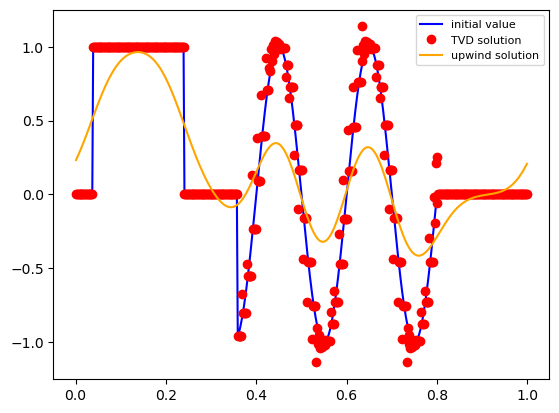

In [55]:
# Visualize the problem solution
hfig, ax = plt.subplots(1, 1)
ax.plot(x, phiinit.innerCellValues, 'b-', label='initial value')
ax.plot(x, phi.innerCellValues, 'ro', label='TVD solution')
ax.plot(x, phiuw.innerCellValues, '-', color='orange', label='upwind solution');
ax.legend(fontsize=8);

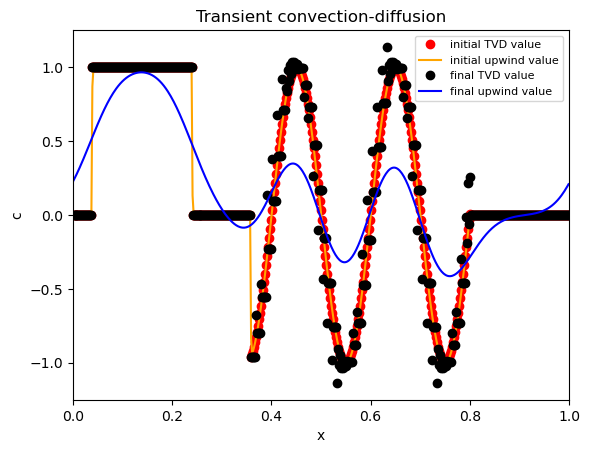

In [56]:
# Plotting and visualization of the 1D transient diffusion solution  
from matplotlib.animation import FuncAnimation

# phi_tvd, phi_uw

hfig1, ax1 = plt.subplots()
ax1.plot(x, phi_tvd[0].innerCellValues, 'ro', label='initial TVD value')
ax1.plot(x, phi_uw[0].innerCellValues, '-', color='orange', label='initial upwind value')

ax1.plot(x, phi_tvd[-1].innerCellValues, 'ko', label='final TVD value')
ax1.plot(x, phi_uw[-1].innerCellValues, '-', color='blue', label='final upwind value')

ax1.set_xlim((0, W))
ax1.set_ylim((-1.25, 1.25))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('Transient convection-diffusion')

ax1.legend(fontsize=8);

In [57]:
## method of lines: using Matlab's ODE solvers for adaptive time stepping
#
#
# ## solving a nonlinear PDE
#
# ## solving a system of linear PDE's: sequential and coupled methods
#
# ## solving a system of nonlinear PDE's: sequential and coupled olutions
#
# ## Real life cases: water-flooding in the production of oil
#
# ## and finally your examples?
#
#
#

The generalized form of the equations solved in this package looks like, 
    $$ \alpha \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) + \beta \varphi = \gamma $$

with boundary condition,
    $$ a\nabla\varphi\cdot \vec{e} + b\varphi = c $$.


### 1D Diffusion with a fixed concentration 

(Dirichlet left boundary, Neumann right boundary)

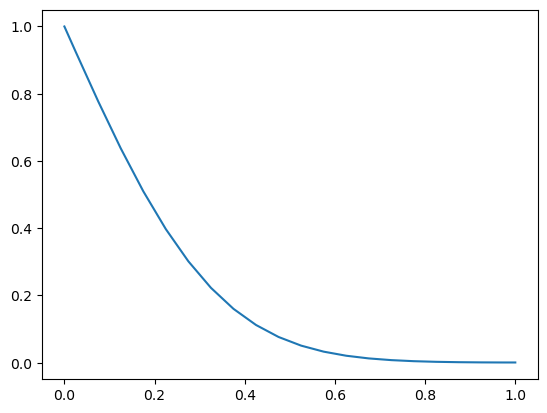

In [58]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side
Nx = 20 # number of finite volume cells
Lx = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

m1 = pf.Grid1D(Nx, Lx) # mesh object
bc = pf.BoundaryConditions(m1) # Neumann boundary condition by default

# switch the left boundary to Dirichlet: fixed concentration
bc.left.a[:] = 0.0
bc.left.b[:] = 1.0
bc.left.c[:] = c_left

# create a cell variable with initial concentration
c_old = pf.CellVariable(m1, c_init, bc)

# assign diffusivity to cells
D_cell = pf.CellVariable(m1, D_val)
D_face = pf.geometricMean(D_cell) # average value of diffusivity at the interfaces between cells

# Discretization
Mdiff = pf.diffusionTerm(D_face)
Mbc, RHSbc = pf.boundaryConditionsTerm(bc)

# time loop
t = 0
while t<t_simulation:
    t+=dt
    Mt, RHSt = pf.transientTerm(c_old, dt, 1.0)
    c_new = pf.solveMatrixPDE(m1, Mt-Mdiff+Mbc, RHSbc+RHSt)
    c_old.update_value(c_new)

pf.visualizeCells(c_old)

### Diffusion in 1D cylindrical mesh

Analytic solution to the heat transfer problem + numerical solution with pyfvtool

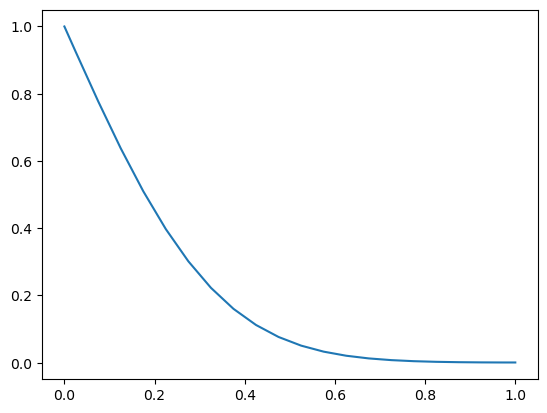

In [59]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side
Nr = 20 # number of finite volume cells
Lr = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

m1 = pf.Grid1D(Nr, Lr) # mesh object
bc = pf.BoundaryConditions(m1) # Neumann boundary condition by default

# switch the left boundary to Dirichlet: fixed concentration
bc.left.a[:] = 0.0
bc.left.b[:] = 1.0
bc.left.c[:] = c_left

# create a cell variable with initial concentration
c_old = pf.CellVariable(m1, c_init, bc)

# assign diffusivity to cells
D_cell = pf.CellVariable(m1, D_val)
D_face = pf.geometricMean(D_cell) # average value of diffusivity at the interfaces between cells

# Discretization
Mdiff = pf.diffusionTerm(D_face)
Mbc, RHSbc = pf.boundaryConditionsTerm(bc)

# time loop
t = 0
while t<t_simulation:
    t+=dt
    Mt, RHSt = pf.transientTerm(c_old, dt, 1.0)
    c_new = pf.solveMatrixPDE(m1, Mt-Mdiff+Mbc, RHSbc+RHSt)
    c_old.update_value(c_new)

pf.visualizeCells(c_old)